<a href="https://colab.research.google.com/github/gnryu/DataScience_TermProject/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective Setting**
predict severity of car accident

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import io
import pandas as pd
import numpy as np

In [3]:
# read data
data = pd.read_csv('/content/drive/Shareddrives/DataScience_TermProject/US_Accidents_Dec21_updated.csv')
data=data.drop(columns='Number',axis=1)
column_names=data.columns.values.tolist()
print(column_names)

['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


## **Data Curation**
we are going to use only samples of certain city with well-stratified severity<br>
select data of *'City = Orlando'* stratified in *Severity* feature

In [4]:
data.shape # sample: 2845342, feature: 46

(2845342, 46)

In [4]:
from sklearn.model_selection import train_test_split
from pandas.core.frame import DataFrame

In [5]:
print(data['Severity'].value_counts())
X=np.array(data)
y=np.array(data['Severity'])
city_train,city_test,y_train,y_test=train_test_split(X,y,test_size=0.005,stratify=y)
print(DataFrame(y_test).value_counts()/len(DataFrame(y_test)))

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64
2    0.890209
3    0.054544
4    0.046110
1    0.009138
dtype: float64


In [7]:
# check how many samples are in each city
print(data['City'].value_counts())

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64


In [6]:
# check the distribution for each severity(1 ~ 4) in 'City = Miami'
data_Miami=pd.DataFrame.copy(data[data['City']=='Miami'])
print(data_Miami['Severity'].value_counts())
X=np.array(data_Miami)
y=np.array(data_Miami['Severity'])
city_train1,city_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.1,stratify=y)
print(DataFrame(y_test1).value_counts()/len(DataFrame(y_test1)))
print()
print(len(city_test1))

2    102955
3      2379
4      1580
1        52
Name: Severity, dtype: int64
2    0.962513
3    0.022249
4    0.014770
1    0.000467
dtype: float64

10697


In [9]:
# check the distribution for each severity(1 ~ 4) in 'City = Los Angeles'
data_LA=pd.DataFrame.copy(data[data['City']=='Los Angeles'])
print(data_LA['Severity'].value_counts())
X=np.array(data_LA)
y=np.array(data_LA['Severity'])
city_train2,city_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.15,stratify=y)
print(DataFrame(y_test2).value_counts()/len(DataFrame(y_test2)))
print()
print(len(city_test2))

2    66220
3     2010
4      726
Name: Severity, dtype: int64
2    0.960363
3    0.029099
4    0.010538
dtype: float64

10344


In [7]:
# check the distribution for each severity(1 ~ 4) in 'City = Orlando'
data_Orlando=pd.DataFrame.copy(data[data['City']=='Orlando'])
print(data_Orlando['Severity'].value_counts())
X=np.array(data_Orlando)
y=np.array(data_Orlando['Severity'])
city_train3,city_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.2,stratify=y)
print(DataFrame(y_test3).value_counts()/len(DataFrame(y_test3)))
print()
print(len(city_test3))

2    52313
3      996
4      927
1      455
Name: Severity, dtype: int64
2    0.956486
3    0.018192
4    0.017003
1    0.008319
dtype: float64

10939


In [8]:
# we are going to see only 'City = Orlando' data
data_Orlando=pd.DataFrame(city_test3,columns=column_names)
print(data_Orlando.shape)

(10939, 46)


## **Data Inspection**

In [9]:
data_Orlando = data_Orlando.infer_objects()
print(data_Orlando.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10939 non-null  object 
 1   Severity               10939 non-null  int64  
 2   Start_Time             10939 non-null  object 
 3   End_Time               10939 non-null  object 
 4   Start_Lat              10939 non-null  float64
 5   Start_Lng              10939 non-null  float64
 6   End_Lat                10939 non-null  float64
 7   End_Lng                10939 non-null  float64
 8   Distance(mi)           10939 non-null  float64
 9   Description            10939 non-null  object 
 10  Street                 10939 non-null  object 
 11  Side                   10939 non-null  object 
 12  City                   10939 non-null  object 
 13  County                 10939 non-null  object 
 14  State                  10939 non-null  object 
 15  Zi

In [ ]:
data_Orlando.head()

,Severity,Distance(mi),Street,Side,Zipcode,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),Lat,Lng
0,2,0.509,S John Young Pkwy,L,32805,KORL,84.0,84.0,76.0,30.07,...,False,False,False,Day,Day,Day,Day,137.0,28.542507,-81.414072
1,2,0.085,E Colonial Dr,L,32826-4702,KORL,76.0,76.0,79.0,30.09,...,False,False,False,Day,Day,Day,Day,123.0,28.566381,-81.207239
2,2,0.907,Osceola Pkwy,R,32830,KISM,83.0,83.0,29.0,29.93,...,False,False,False,Day,Day,Day,Day,108.0,28.342233,-81.591560
3,2,0.143,S Orange Blossom Trl,R,32809-6908,KMCO,73.0,73.0,73.0,29.94,...,False,False,False,Night,Night,Night,Night,1288.0,28.451191,-81.400082
4,2,0.748,Hidden Beach Blvd,R,32835,KORL,56.0,56.0,87.0,29.91,...,False,False,False,Night,Night,Night,Day,696.0,28.493720,-81.464983


In [ ]:
data_Orlando['Severity'].value_counts()

2    9765
4      96
1      86
3      77
Name: Severity, dtype: int64

In [ ]:
data_Orlando['Weather_Condition'].value_counts()

Fair                            4476
Mostly Cloudy                   2146
Partly Cloudy                   1242
Cloudy                           880
Light Rain                       507
Thunder                          143
Thunder in the Vicinity          101
Rain                              78
Light Rain with Thunder           78
Heavy Rain                        64
T-Storm                           62
Heavy T-Storm                     50
Fog                               33
Fair / Windy                      22
Mostly Cloudy / Windy             20
Partly Cloudy / Windy             16
Patches of Fog                    14
Overcast                          13
Clear                             13
Haze                               9
Heavy Thunderstorms and Rain       8
Cloudy / Windy                     8
Shallow Fog                        8
Scattered Clouds                   5
Light Thunderstorms and Rain       5
Thunderstorms and Rain             4
Heavy T-Storm / Windy              4
L

In [ ]:
dtype_df = data_Orlando.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,Severity,int64
1,Distance(mi),float64
2,Street,object
3,Side,object
4,Zipcode,object
5,Airport_Code,object
6,Temperature(F),float64
7,Wind_Chill(F),float64
8,Humidity(%),float64
9,Pressure(in),float64


In [ ]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,13
1,int64,1
2,float64,11
3,object,10


In [ ]:
print(data_Orlando.describe()) #no outlier

           Severity  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  10024.000000  10024.000000    10024.000000   10024.000000   
mean       2.018256      0.267794       75.669693      75.634377   
std        0.232897      0.489246        9.704231       9.828260   
min        1.000000      0.000000       14.000000       0.000000   
25%        2.000000      0.081000       70.000000      70.000000   
50%        2.000000      0.136000       77.000000      77.000000   
75%        2.000000      0.255000       83.000000      83.000000   
max        4.000000     11.633000       97.000000      97.000000   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  10024.000000  10024.000000    10024.000000     10024.000000   
mean      68.007482     29.940607        9.591151         8.304300   
std       17.770142      0.127277        1.620508         4.595305   
min       19.000000     28.690000        0.000000         0.000000   
25%       54.000000     29.870000    

In [ ]:
data_Orlando.describe(percentiles = [.1, .99])

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Time_Duration(min),Lat,Lng
count,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000,10024.000000
mean,2.018256,0.267794,75.669693,75.634377,68.007482,29.940607,9.591151,8.304300,0.009346,220.542398,28.500528,-81.392068
std,0.232897,0.489246,9.704231,9.828260,17.770142,0.127277,1.620508,4.595305,0.070445,331.284525,0.263629,0.086861
min,1.000000,0.000000,14.000000,0.000000,19.000000,28.690000,0.000000,0.000000,0.000000,9.000000,28.313236,-81.593265
10%,2.000000,0.027000,63.000000,63.000000,45.000000,29.790000,10.000000,3.000000,0.000000,31.000000,28.401936,-81.477811
50%,2.000000,0.136000,77.000000,77.000000,68.000000,29.940000,10.000000,8.000000,0.000000,125.000000,28.493916,-81.404998
99%,3.000000,2.504110,93.000000,93.000000,100.000000,30.210000,10.000000,20.770000,0.240000,1515.000000,28.618507,-81.156830
max,4.000000,11.633000,97.000000,97.000000,100.000000,30.390000,10.000000,33.400000,2.570000,7366.000000,38.939025,-80.545762


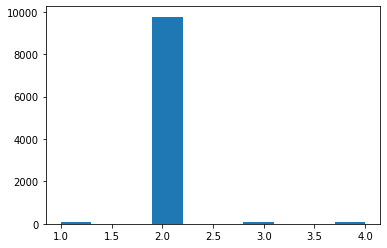

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data_Orlando['Severity'])
plt.show()

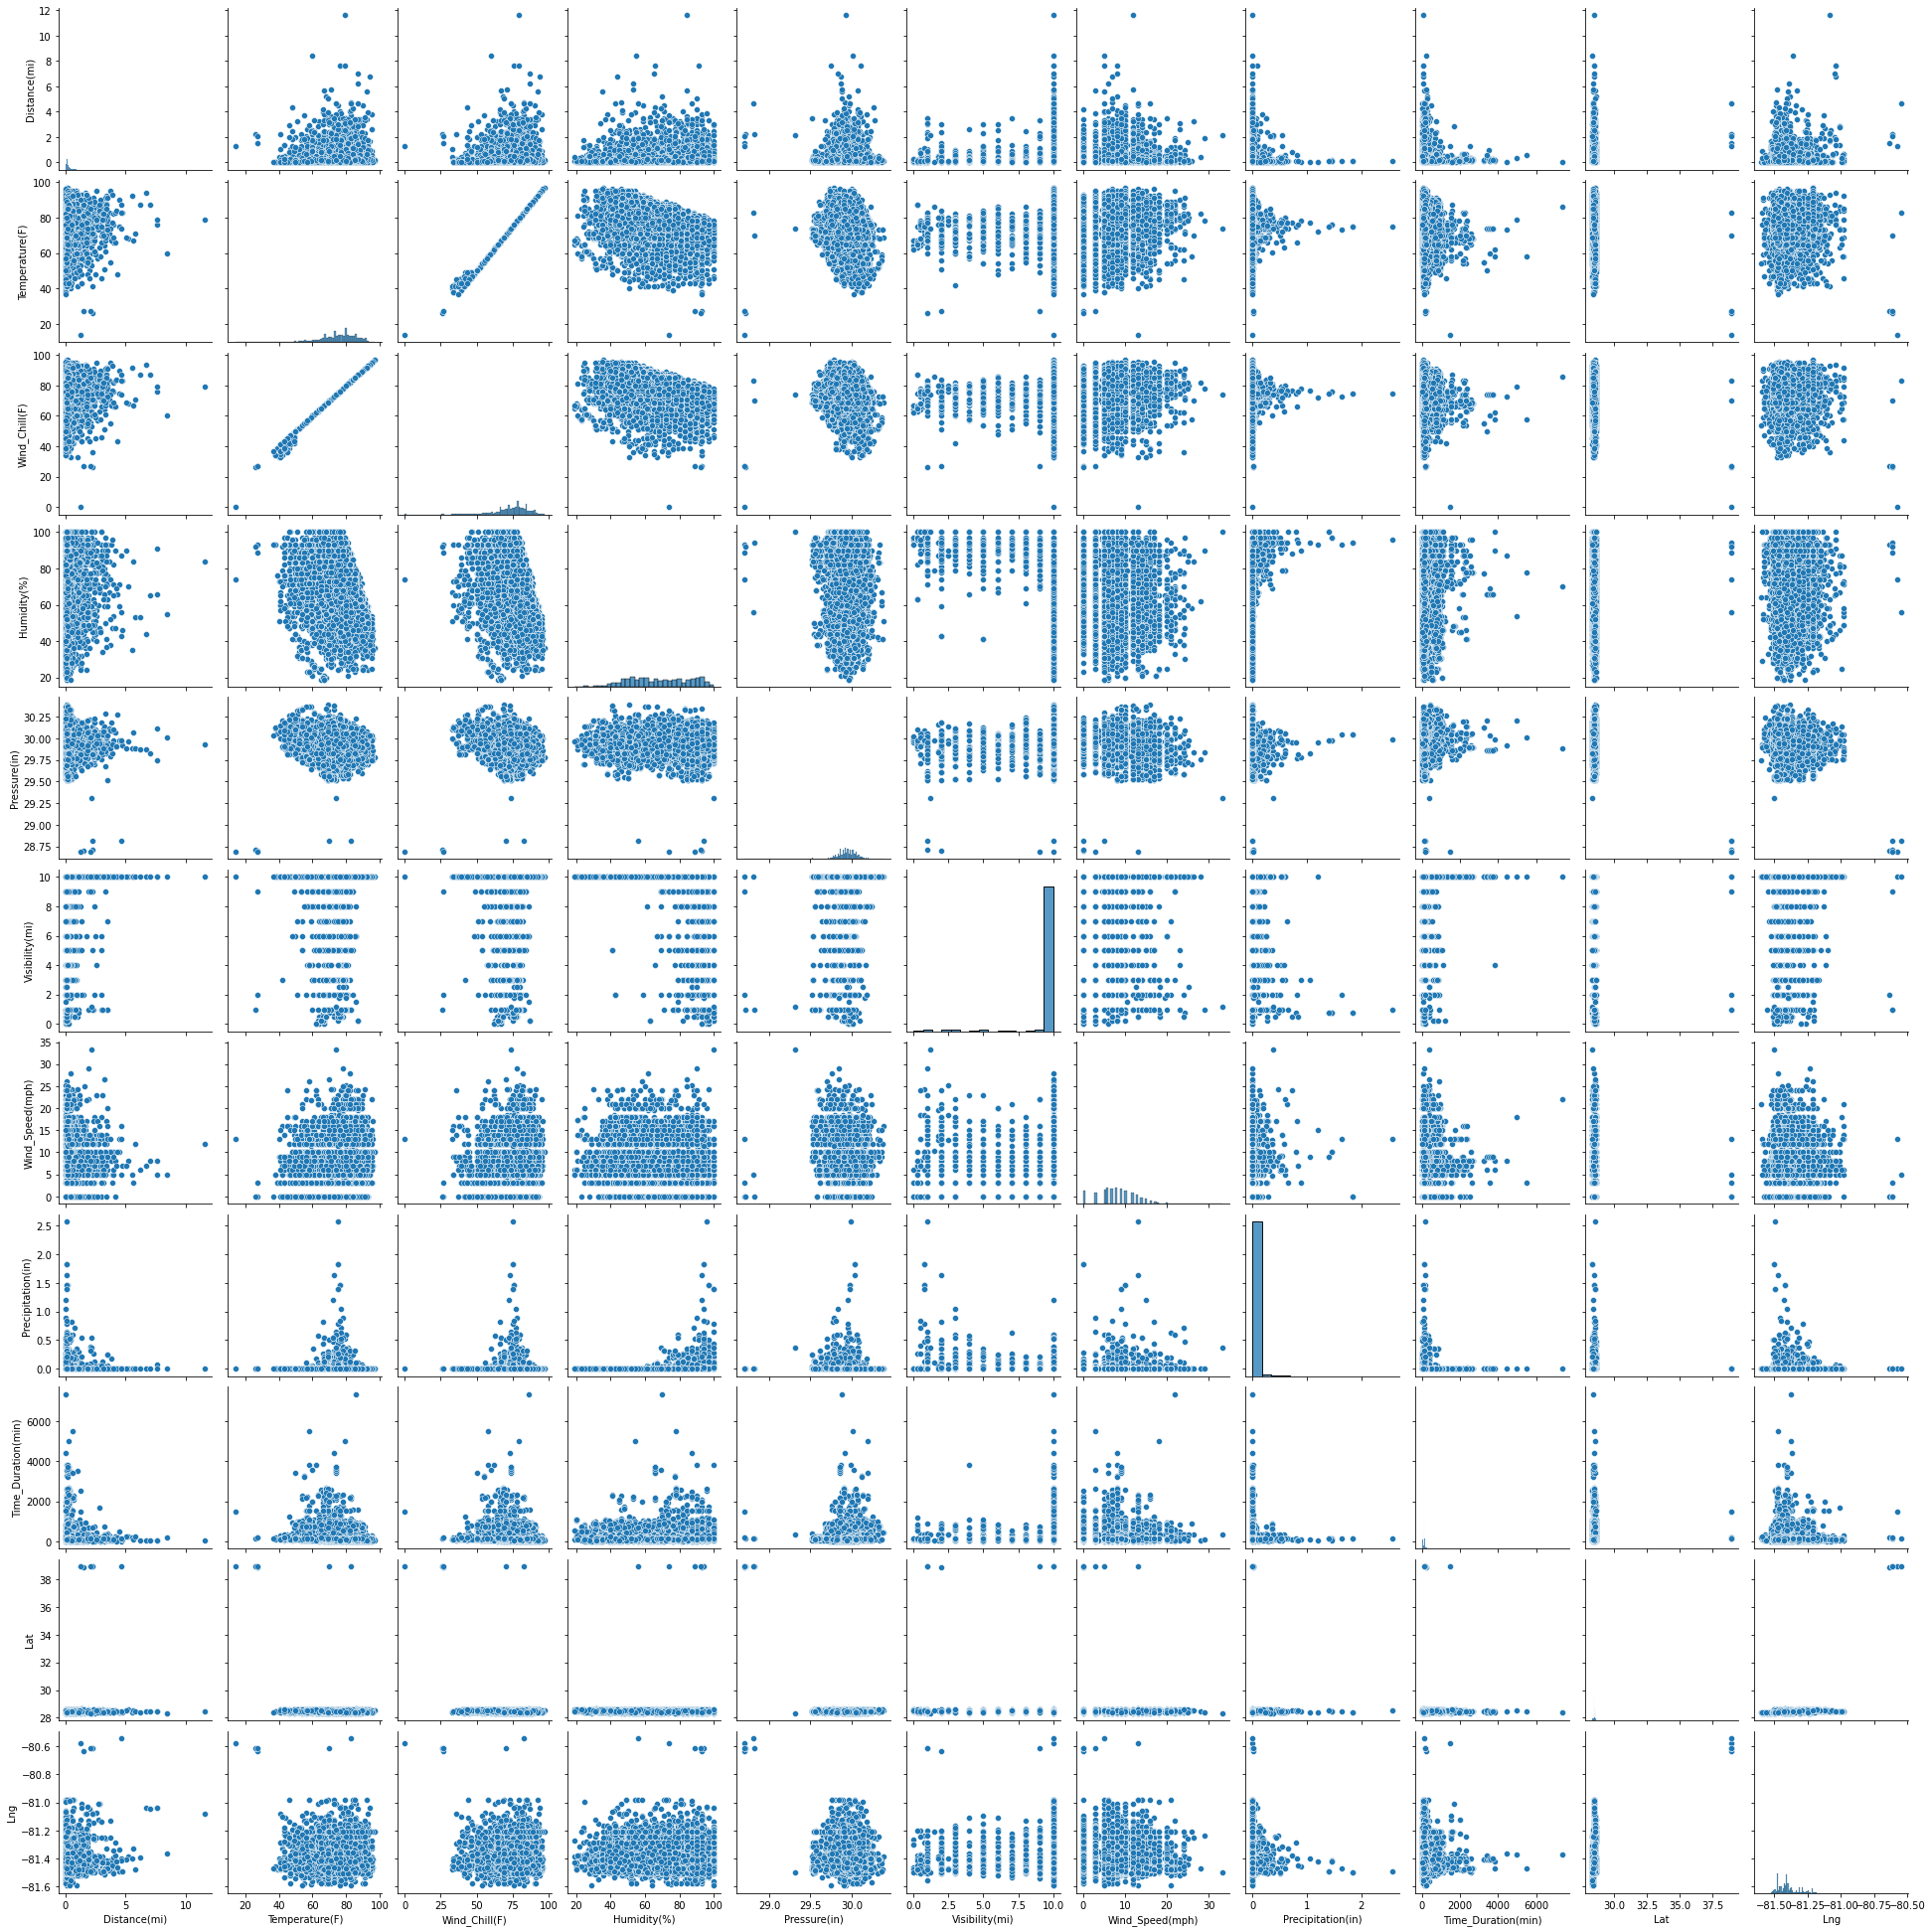

In [ ]:
sns.pairplot(data_Orlando.loc[:,data_Orlando.dtypes == 'float64'])
plt.show()

## **Data Preprocessing**

cleaning dirty data

In [10]:
# drop the sample with missing value
print(data_Orlando.isna().sum())
data_Orlando.dropna(axis=0,subset=['Precipitation(in)','Temperature(F)','Pressure(in)','Wind_Direction','Wind_Speed(mph)','Weather_Condition','Visibility(mi)'],inplace=True)
print('\nafter drop\n')
print(data_Orlando.isna().sum())
print()
print(len(data_Orlando))

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
Description                0
Street                     0
Side                       0
City                       0
County                     0
State                      0
Zipcode                    0
Country                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp         19
Temperature(F)            41
Wind_Chill(F)            981
Humidity(%)               41
Pressure(in)              28
Visibility(mi)            33
Wind_Direction            56
Wind_Speed(mph)          152
Precipitation(in)        824
Weather_Condition         25
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit       

feature reduction

In [11]:
# remove features with redundant value
# remove unnecessary features like 'ID'
data_Orlando.drop(axis=1,columns = ["ID", "Description", "City", "County", "State", "Country", "Timezone"], inplace = True)
data_Orlando['Wind_Chill(F)'].fillna(data_Orlando['Temperature(F)'],inplace=True)
print(data_Orlando.isna().sum())
print(len(data_Orlando))

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
Zipcode                  0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
N

In [12]:
# make new feature: 'Time_Duration(min)' from 'Start_Time' and 'End_Time'
data_Orlando['Start_Time'] = pd.to_datetime(data_Orlando['Start_Time'], errors='coerce')
data_Orlando['End_Time'] = pd.to_datetime(data_Orlando['End_Time'], errors='coerce')
data_Orlando['Time_Duration(min)']=round((data_Orlando['End_Time']-data_Orlando['Start_Time'])/np.timedelta64(1,'m'))
data_Orlando.drop(axis=1,columns = ["Start_Time",'End_Time','Weather_Timestamp'], inplace = True)

# make new feature: 'Lat' from 'Start_Lat' and 'End_Lat'
# make new feature: 'Lng' from 'Start_Lng' and 'End_Lng'
data_Orlando['Lat']=(data_Orlando['Start_Lat']+data_Orlando['End_Lat'])/2
data_Orlando['Lng']=(data_Orlando['Start_Lng']+data_Orlando['End_Lng'])/2
data_Orlando.drop(axis=1,columns = ["Start_Lat",'End_Lat','Start_Lng','End_Lng'], inplace = True)

print(data_Orlando)
column_names2=data_Orlando.columns.values.tolist()

       Severity  Distance(mi)                 Street Side     Zipcode  \
0             2         0.077      Lake Underhill Rd    R  32822-6055   
1             2         0.119            Bruton Blvd    R  32805-5739   
2             2         0.522      S John Young Pkwy    L       32837   
3             2         0.190         N Hiawassee Rd    R  32818-3962   
4             2         0.164   Old Winter Garden Rd    R       32805   
...         ...           ...                    ...  ...         ...   
10933         2         0.166      S John Young Pkwy    R       32837   
10934         2         0.013         W Oak Ridge Rd    R  32809-3604   
10935         2         0.132        N Pine Hills Rd    R  32808-4424   
10936         1         0.000                  I-4 E    R       32805   
10938         2         0.015       E Buena Vista Dr    R       32830   

      Airport_Code  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0             KORL            79.0         

feature selection

In [13]:
# use only 1000 samples to get feature importance
X=np.array(data_Orlando)
y=np.array(data_Orlando['Severity'])
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.1,stratify=y)
print(len(X_train4))
print(len(X_test4))
print(len(y_train4))
print(len(y_test4))

9033
1004
9033
1004


In [14]:
X_sample = pd.DataFrame(X_test4,columns = column_names2)
X_sample.columns

Index(['Severity', 'Distance(mi)', 'Street', 'Side', 'Zipcode', 'Airport_Code',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Time_Duration(min)', 'Lat', 'Lng'],
      dtype='object')

In [15]:
X_sample = X_sample.infer_objects()
X_sample.dtypes

Severity                   int64
Distance(mi)             float64
Street                    object
Side                      object
Zipcode                   object
Airport_Code              object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_T

In [16]:
from sklearn import preprocessing

# before getting feature importance,
# encode categorical features using Label Encoder
df_categorical_features = X_sample.select_dtypes(include = ['object'])
categorical_features = df_categorical_features.columns

le = preprocessing.LabelEncoder()
for i in range(len(categorical_features)):
  X_sample[categorical_features[i]] = le.fit_transform(X_sample[categorical_features[i]])

# scale float features using Standard Scaler
df_float_features = X_sample.select_dtypes(include = ['float64'])
float_features = df_float_features.columns

scaler = preprocessing.StandardScaler()
X_sample[float_features] = scaler.fit_transform(df_float_features[float_features])

# change boolean type to integer
# False: 0, True: 1
X_sample.replace({False: 0, True: 1}, inplace = True)
X_sample

,Severity,Distance(mi),Street,Side,Zipcode,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),Lat,Lng
0,2,-0.189125,94,0,46,2,-0.717526,-0.715877,1.336223,-0.274355,...,0,0,0,1,1,1,1,1.998729,0.861897,-0.238871
1,2,-0.324419,81,0,260,2,-0.163205,-0.162489,-1.416163,0.625816,...,0,0,0,0,0,0,0,-0.265726,1.048037,2.169650
2,2,-0.230402,142,1,182,1,1.499760,1.497676,-0.535399,0.052980,...,0,0,0,0,0,0,0,-0.228297,-0.280251,-1.285740
3,2,-0.177660,119,1,146,2,-0.939255,-0.937232,1.005937,0.789484,...,0,0,0,0,0,0,0,-0.263052,0.504151,-0.771044
4,2,-0.558318,245,1,257,1,-1.160983,-1.158588,1.171080,0.625816,...,0,1,0,0,0,0,0,-0.391380,-1.827732,1.741809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2,-0.255626,57,0,200,1,0.280253,0.280222,0.840794,-0.765357,...,0,0,0,1,1,1,1,-0.265726,-0.616757,-0.907669
1000,2,-0.315247,32,1,83,2,0.723710,0.722932,-1.085877,0.953151,...,0,0,0,0,0,0,0,-0.265726,1.079336,1.246488
1001,2,-0.590422,275,1,0,2,0.047438,0.047799,1.226128,1.771489,...,0,1,0,0,0,0,0,0.370567,0.651473,0.122425
1002,2,-0.425317,95,1,2,2,0.058524,0.058866,0.125173,-0.765357,...,0,0,0,0,0,0,0,-0.249685,0.854668,0.191045


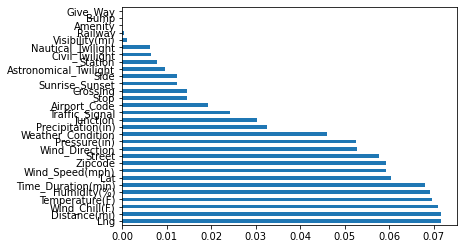

Feature ranking:
1. feature Distance(mi) (0.105)
2. feature Time_Duration(min) (0.095)
3. feature Lng (0.080)
4. feature Temperature(F) (0.070)
5. feature Wind_Chill(F) (0.067)
6. feature Lat (0.066)
7. feature Humidity(%) (0.064)
8. feature Street (0.060)
9. feature Zipcode (0.058)
10. feature Wind_Speed(mph) (0.057)
11. feature Pressure(in) (0.054)
12. feature Weather_Condition (0.044)
13. feature Wind_Direction (0.043)
14. feature Junction (0.020)
15. feature Precipitation(in) (0.018)
16. feature Traffic_Signal (0.015)
17. feature Astronomical_Twilight (0.014)
18. feature Sunrise_Sunset (0.012)
19. feature Nautical_Twilight (0.012)
20. feature Airport_Code (0.008)
21. feature Crossing (0.008)
22. feature Stop (0.008)
23. feature Civil_Twilight (0.008)
24. feature Side (0.005)
25. feature Station (0.004)
26. feature Visibility(mi) (0.004)
27. feature Railway (0.000)
28. feature Amenity (0.000)
29. feature Give_Way (0.000)
30. feature No_Exit (0.000)
31. feature Roundabout (0.000)
32.

In [17]:
# get feature importance and select top13 feature

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import ExtraTreesClassifier

fX = X_sample.iloc[:,1:]
fy = X_sample['Severity']

model = ExtraTreesClassifier()

model.fit(fX,fy)

#okit grap of feature importances for better visualization

f = pd.Series(model.feature_importances_, index=fX.columns)
f.nlargest(30).plot(kind='barh')

plt.show()

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(fX, fy)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(fX.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, fX.columns[indices][f], importances[indices[f]]))

In [18]:
# we are going to train and test with only 14 features (top 13 features of feature importance + 1 target feature)
# data_Orlando_test: the dataset we are going to use
data_Orlando_test = data_Orlando.loc[:, ['Severity', 'Distance(mi)', 'Time_Duration(min)', 'Street', 'Lng', 'Humidity(%)', 'Pressure(in)', 'Lat', 'Temperature(F)', 'Zipcode', 'Wind_Chill(F)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]
data_Orlando_test = data_Orlando_test.infer_objects()
data_Orlando_test

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2,0.077,124.0,Lake Underhill Rd,-81.286181,62.0,29.99,28.539453,79.0,32822-6055,79.0,WNW,5.0,Fair
1,2,0.119,124.0,Bruton Blvd,-81.425324,50.0,29.92,28.509416,81.0,32805-5739,81.0,W,8.0,Partly Cloudy
2,2,0.522,22.0,S John Young Pkwy,-81.424281,76.0,29.58,28.407909,70.0,32837,70.0,WSW,12.0,Light Rain
3,2,0.190,129.0,N Hiawassee Rd,-81.476369,70.0,29.90,28.576318,66.0,32818-3962,66.0,NNW,6.0,Fair
4,2,0.164,128.0,Old Winter Garden Rd,-81.413507,72.0,30.06,28.545740,85.0,32805,85.0,E,8.0,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10933,2,0.166,145.0,S John Young Pkwy,-81.425582,49.0,30.02,28.409420,71.0,32837,71.0,NNE,7.0,Fair
10934,2,0.013,256.0,W Oak Ridge Rd,-81.427865,67.0,29.99,28.472254,42.0,32809-3604,36.0,NW,12.0,Partly Cloudy
10935,2,0.132,159.0,N Pine Hills Rd,-81.452053,79.0,29.85,28.577231,82.0,32808-4424,82.0,NE,8.0,Partly Cloudy
10936,1,0.000,50.0,I-4 E,-81.389890,73.0,29.79,28.514720,74.0,32805,74.0,SW,6.0,Mostly Cloudy


In [18]:
print(data_Orlando_test.shape)
print()
data_Orlando_test.dtypes

(10005, 14)



Severity                int64
Distance(mi)          float64
Time_Duration(min)    float64
Street                 object
Lng                   float64
Humidity(%)           float64
Pressure(in)          float64
Lat                   float64
Temperature(F)        float64
Zipcode                object
Wind_Chill(F)         float64
Wind_Direction         object
Wind_Speed(mph)       float64
Weather_Condition      object
dtype: object

**scaling & encoding method**<br>
min-max scaling & one-hot encoding

In [19]:
def MinMaxSacling_OneHotEncoding(sampleData):
    from sklearn.preprocessing import MinMaxScaler
    
    df = pd.DataFrame.copy(sampleData)

    df_categorical_features = sampleData.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns

    df = pd.get_dummies(df[categorical_features], drop_first=True)

    df_float_features = sampleData.select_dtypes(include = ['float64'])
    float_features = df_float_features.columns

    scaler = MinMaxScaler()
    df[float_features] = scaler.fit_transform(df_float_features[float_features])

    df = pd.concat([df, sampleData['Lng']],axis=1)
    df = pd.concat([df, sampleData['Lat']],axis=1)

    return df

In [ ]:
minMaxOneHot = MinMaxSacling_OneHotEncoding(data_Orlando_test)
minMaxOneHot

,Street_ 19th St,Street_ 28th St,Street_ 29th St,Street_ 3 Lick Rd,Street_ 33rd St,Street_ 35th St,Street_ 37th St,Street_ 38th St,Street_ 39th St,Street_ 40th St,...,Time_Duration(min),Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Wind_Chill(F),Wind_Speed(mph),Lng,Lat
0,0,0,0,0,0,0,0,0,0,0,...,0.017398,0.171066,0.703704,0.811765,0.021577,0.843373,0.865979,0.389222,-81.414072,28.542507
1,0,0,0,0,0,0,0,0,0,0,...,0.015495,0.368520,0.740741,0.823529,0.023824,0.746988,0.783505,0.389222,-81.207239,28.566381
2,0,0,0,0,0,0,0,0,0,0,...,0.013457,0.001627,0.123457,0.729412,0.002729,0.831325,0.855670,0.389222,-81.591560,28.342233
3,0,0,0,0,0,0,0,0,0,0,...,0.173848,0.184422,0.666667,0.735294,0.012983,0.710843,0.752577,0.179641,-81.400082,28.451191
4,0,0,0,0,0,0,0,0,0,0,...,0.093380,0.122464,0.839506,0.717647,0.016985,0.506024,0.577320,0.299401,-81.464983,28.493720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,0,0,0,0,0,0,0,0,0,0,...,0.010058,0.093244,0.518519,0.664706,0.004160,0.855422,0.876289,0.389222,-81.495591,28.357441
10935,0,0,0,0,0,0,0,0,0,0,...,0.016175,0.163109,0.617284,0.723529,0.009794,0.855422,0.876289,0.508982,-81.422407,28.417310
10936,0,0,0,0,0,0,0,0,0,0,...,0.017262,0.270081,0.666667,0.752941,0.013734,0.722892,0.762887,0.179641,-81.310353,28.459170
10937,0,0,0,0,0,0,0,0,0,0,...,0.002311,0.159918,0.320988,0.735294,0.016478,0.746988,0.783505,0.359281,-81.425750,28.488326


min-max scaling & label encoding

In [20]:
def MinMaxSacling_LabelEncoding(sampleData):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import LabelEncoder

    df = pd.DataFrame.copy(sampleData)
    df_categorical_features = sampleData.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns
        
    encoder = preprocessing.LabelEncoder()
    for i in range(0, 4):
        df[categorical_features[i]] = encoder.fit_transform(df[categorical_features[i]])

    df_float_features = sampleData.select_dtypes(include = ['float64'])
    float_features = df_float_features.columns
    
    scaler = MinMaxScaler()
    df[float_features] = scaler.fit_transform(df_float_features[float_features])

    df = pd.concat([df, sampleData['Lng']],axis=1)
    df = pd.concat([df, sampleData['Lat']],axis=1)

    return df

In [ ]:
minMaxLabel = MinMaxSacling_LabelEncoding(data_Orlando_test)
minMaxLabel

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition,Lng,Lat
0,2,0.043755,0.017398,524,0.171066,0.703704,0.811765,0.021577,0.843373,202,0.865979,1,0.389222,31,-81.414072,28.542507
1,2,0.007307,0.015495,171,0.368520,0.740741,0.823529,0.023824,0.746988,1232,0.783505,6,0.389222,20,-81.207239,28.566381
2,2,0.077968,0.013457,942,0.001627,0.123457,0.729412,0.002729,0.831325,1288,0.855670,20,0.389222,3,-81.591560,28.342233
3,2,0.012293,0.173848,531,0.184422,0.666667,0.735294,0.012983,0.710843,615,0.752577,14,0.179641,17,-81.400082,28.451191
4,2,0.064300,0.093380,852,0.122464,0.839506,0.717647,0.016985,0.506024,1314,0.577320,8,0.299401,1,-81.464983,28.493720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,2,0.018912,0.010058,692,0.093244,0.518519,0.664706,0.004160,0.855422,1033,0.876289,6,0.389222,3,-81.495591,28.357441
10935,2,0.012808,0.016175,524,0.163109,0.617284,0.723529,0.009794,0.855422,1369,0.876289,3,0.508982,17,-81.422407,28.417310
10936,2,0.015989,0.017262,985,0.270081,0.666667,0.752941,0.013734,0.722892,1063,0.762887,1,0.179641,3,-81.310353,28.459170
10937,2,0.041176,0.002311,127,0.159918,0.320988,0.735294,0.016478,0.746988,1473,0.783505,8,0.359281,17,-81.425750,28.488326


standard scaling & one-hot encoding

In [21]:
def standard_one_hot(data):
    s_o=pd.DataFrame.copy(data)
    df_float = s_o.select_dtypes(include=['float64'])
    float_features = df_float.columns
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    s_o[float_features] = scaler.fit_transform(df_float[float_features])
    
    df_categorical_features = s_o.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns
    s_o=pd.get_dummies(s_o[categorical_features],drop_first=True)
    
    s_o[['Lat']] = data[['Lat']]
    s_o[['Lng']] = data[['Lng']]
    return s_o

In [24]:
standard_one_hot(data_Orlando_test)

,Street_ 16th Ave,Street_ 26th St,Street_ 27th St,Street_ 29th St,Street_ 2nd Ave,Street_ 33rd St,Street_ 35th St,Street_ 37th St,Street_ 40th St,Street_ 41st St,...,Weather_Condition_Shallow Fog,Weather_Condition_Smoke,Weather_Condition_T-Storm,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Lat,Lng
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.482388,-81.459105
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.450340,-81.478398
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.433660,-81.409320
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.614740,-81.444113
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.495701,-81.330416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,28.366015,-81.436868
10935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.450499,-81.402456
10936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.471021,-81.417377
10937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.396890,-81.393595


standard scaling & label encoding

In [22]:
def standard_label(data):
    from sklearn import preprocessing
    s_l=pd.DataFrame.copy(data)

    df_categorical_features = s_l.select_dtypes(include = ['object'])
    categorical_features = df_categorical_features.columns

    le = preprocessing.LabelEncoder()
    for i in range(len(categorical_features)):
        s_l[categorical_features[i]] = le.fit_transform(s_l[categorical_features[i]])

    from sklearn.preprocessing import StandardScaler
    df_float = s_l.select_dtypes(include=['float64'])
    float_features = df_float.columns
    
    scaler = StandardScaler()
    s_l[float_features] = scaler.fit_transform(df_float[float_features])
    s_l[['Lat']] = data[['Lat']]
    s_l[['Lng']] = data[['Lng']]
    return s_l

In [39]:
standard_label(data_Orlando_test)

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2,-0.357944,-0.254174,522,-81.459105,-0.076129,-0.562360,28.482388,0.444246,946,0.441899,6,0.803862,3
1,2,-0.332100,1.516425,657,-81.478398,0.888413,0.213813,28.450340,-1.189526,929,-1.167989,5,-0.054734,21
2,3,-0.544816,-0.559350,832,-81.409320,0.718200,1.766158,28.433660,-0.474751,921,-0.463663,0,-1.771926,3
3,2,-0.423548,0.094188,493,-81.444113,-0.303080,1.766158,28.614740,-0.985304,697,-0.966753,7,-0.484032,1
4,2,-0.338064,1.965553,505,-81.330416,-0.586768,0.757133,28.495701,0.750579,768,0.743753,2,1.233160,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,2,3.844692,-0.432673,757,-81.436868,0.207560,-0.019039,28.366015,0.852690,1359,0.844371,15,0.374564,30
10935,2,-0.087576,-0.567987,550,-81.402456,-2.118688,0.679516,28.450499,-0.372640,633,-0.363045,9,-0.484032,3
10936,2,0.065500,-0.507528,521,-81.417377,-0.303080,-0.717594,28.471021,1.261133,561,1.246843,8,1.018511,18
10937,2,7.417131,-0.542076,831,-81.393595,0.774938,-0.019039,28.396890,0.648468,1123,0.643135,3,-0.698681,3


robust scaling & one-hot encoding

In [23]:
def robust_oneHot(data):
  from sklearn import preprocessing
  
  # se_data: copied data where the data to be scaled and encoded will be stored
  se_data = pd.DataFrame.copy(data)

  # get features with float type values
  df_float = se_data.select_dtypes(include = ['float64'])
  float_features = df_float.columns

  # scale float values using Robust Scaler
  rs = preprocessing.RobustScaler()
  se_data[float_features] = rs.fit_transform(df_float[float_features])

  # Latitude and Longitude are not scaled
  se_data[['Lat']] = data[['Lat']]
  se_data[['Lng']] = data[['Lng']]

  # get features with categorical type values
  df_categorical = se_data.select_dtypes(include = ['object'])
  categorical_features = df_categorical.columns

  # encode categorical values using One Hot Encoding
  se_data = pd.get_dummies(se_data[categorical_features])

  return se_data

In [ ]:
robust_oneHot(data_Orlando_test)

,Street_ 10th Ave,Street_ 19th St,Street_ 28th St,Street_ 29th St,Street_ 3 Lick Rd,Street_ 33rd St,Street_ 35th St,Street_ 37th St,Street_ 38th St,Street_ 39th St,...,Weather_Condition_Rain / Windy,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


robust scaling & label encoding

In [24]:
def robust_label(data):
  from sklearn import preprocessing

  # se_data: copied data where the data to be scaled and encoded will be stored
  se_data = pd.DataFrame.copy(data)

  # get features with float type values
  df_float = se_data.select_dtypes(include = ['float64'])
  float_features = df_float.columns

  # scale float values using Robust Scaler
  rs = preprocessing.RobustScaler()
  se_data[float_features] = rs.fit_transform(df_float[float_features])

  # Latitude and Longitude are not scaled
  se_data[['Lat']] = data[['Lat']]
  se_data[['Lng']] = data[['Lng']]

  # get features with categorical type values
  df_categorical = se_data.select_dtypes(include = ['object'])
  categorical_features = df_categorical.columns

  # encode categorical values using Label Encoder
  le = preprocessing.LabelEncoder()
  for i in range(len(categorical_features)):
    se_data[categorical_features[i]] = le.fit_transform(se_data[categorical_features[i]])
  
  return se_data

In [ ]:
robust_label(data_Orlando_test)

,Severity,Distance(mi),Time_Duration(min),Street,Lng,Humidity(%),Pressure(in),Lat,Temperature(F),Zipcode,Wind_Chill(F),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2,2.143678,0.127660,524,-81.414072,0.266667,0.8125,28.542507,0.538462,202,0.538462,1,0.833333,31
1,2,-0.293103,-0.021277,171,-81.207239,0.366667,0.9375,28.566381,-0.076923,1232,-0.076923,6,0.833333,20
2,2,4.431034,-0.180851,942,-81.591560,-1.300000,-0.0625,28.342233,0.461538,1288,0.461538,20,0.833333,3
3,2,0.040230,12.372340,531,-81.400082,0.166667,0.0000,28.451191,-0.307692,615,-0.307692,14,-0.333333,17
4,2,3.517241,6.074468,852,-81.464983,0.633333,-0.1875,28.493720,-1.615385,1314,-1.615385,8,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,2,0.482759,-0.446809,692,-81.495591,-0.233333,-0.7500,28.357441,0.615385,1033,0.615385,6,0.833333,3
10935,2,0.074713,0.031915,524,-81.422407,0.033333,-0.1250,28.417310,0.615385,1369,0.615385,3,1.500000,17
10936,2,0.287356,0.117021,985,-81.310353,0.166667,0.1875,28.459170,-0.230769,1063,-0.230769,1,-0.333333,3
10937,2,1.971264,-1.053191,127,-81.425750,-0.766667,0.0000,28.488326,-0.076923,1473,-0.076923,8,0.666667,17


## **Data Analysis (Modeling) + Evaluation**

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def Linear_Regression(df, X, y):
  X = df[X].values.reshape(-1,1)
  y = df[y].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  score = model.score(X_test, y_test)
  print("Socre: " + str(score))
  print("coef_ : " + str(model.coef_))
  print("intercept_ : " + str(model.intercept_))

  plt.plot(X_test, y_predict)

  plt.show()


Humidity

<Robust Scaling + Label Encoding>
Socre: 0.003513345207707297
coef_ : [0.01644771]
intercept_ : 2.022180902480063


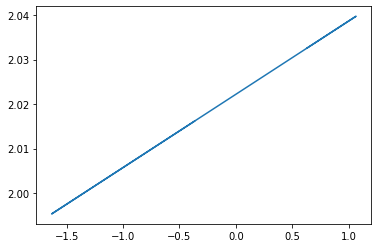


<Min-Max Scaling + Label Encoding>
Socre: 0.003513345207707297
coef_ : [0.04440883]
intercept_ : 1.9953163016041975


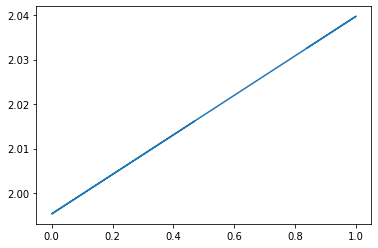


<Standard Scaling + Label Encoding>
Socre: 0.003513345207707519
coef_ : [0.009663]
intercept_ : 2.022368275982581


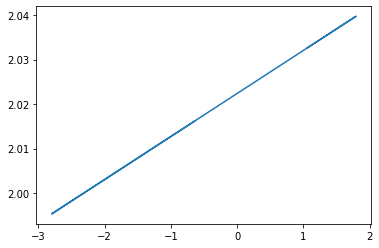

In [45]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Humidity(%)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Humidity(%)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Humidity(%)', 'Severity')

Temperature

<Robust Scaling + Label Encoding>
Socre: 0.001041643209545029
coef_ : [-0.00641725]
intercept_ : 2.021632121503361


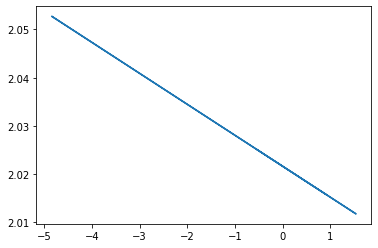


<Min-Max Scaling + Label Encoding>
Socre: 0.001041643209545029
coef_ : [-0.04097165]
intercept_ : 2.05273108721472


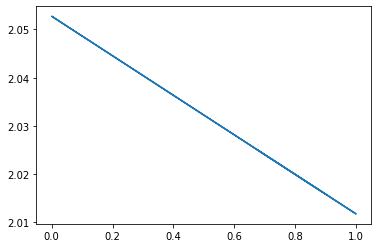


<Standard Scaling + Label Encoding>
Socre: 0.001041643209545029
coef_ : [-0.0048343]
intercept_ : 2.022298839965049


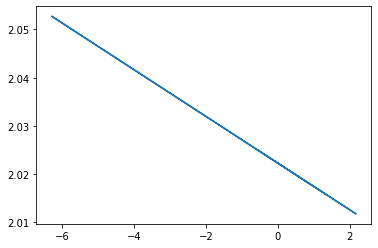

In [46]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Temperature(F)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Temperature(F)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Temperature(F)', 'Severity')

Wind Chill

<Robust Scaling + Label Encoding>
Socre: 0.0012330176292203454
coef_ : [-0.00726263]
intercept_ : 2.0215148010730277


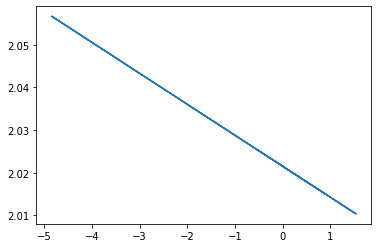


<Min-Max Scaling + Label Encoding>
Socre: 0.0012330176292203454
coef_ : [-0.05139708]
intercept_ : 2.061738603015276


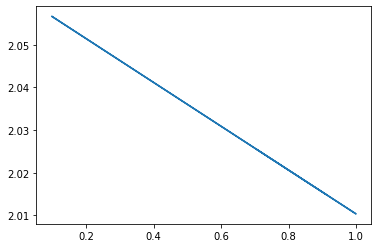


<Standard Scaling + Label Encoding>
Socre: 0.0012330176292203454
coef_ : [-0.00555233]
intercept_ : 2.022292375595088


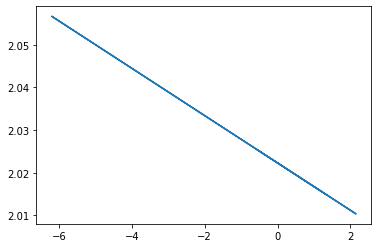

In [47]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Wind_Chill(F)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Wind_Chill(F)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Wind_Chill(F)', 'Severity')

Distance

<Robust Scaling + Label Encoding>
Socre: 0.0025641607046690273
coef_ : [0.008476]
intercept_ : 2.0161102633115044


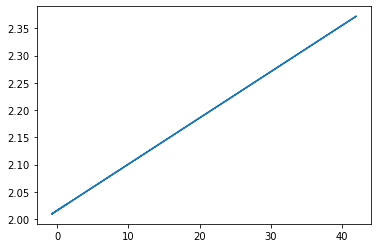


<Min-Max Scaling + Label Encoding>
Socre: 0.0025641607046689163
coef_ : [0.48677824]
intercept_ : 2.009575691549339


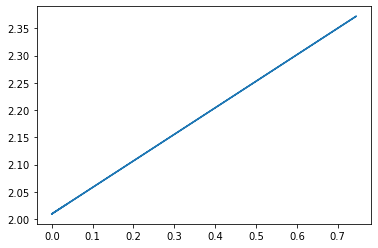


<Standard Scaling + Label Encoding>
Socre: 0.0025641607046690273
coef_ : [0.02381888]
intercept_ : 2.0225526059766885


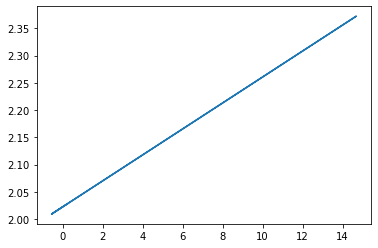

In [48]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Distance(mi)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Distance(mi)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Distance(mi)', 'Severity')

Time Duration

<Robust Scaling + Label Encoding>
Socre: -0.000853192229946842
coef_ : [-0.00147965]
intercept_ : 2.0237924319417218


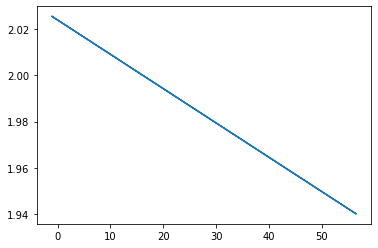


<Min-Max Scaling + Label Encoding>
Socre: -0.000853192229946842
coef_ : [-0.10043675]
intercept_ : 2.025496269713933


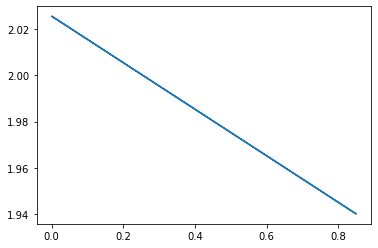


<Standard Scaling + Label Encoding>
Socre: -0.000853192229947064
coef_ : [-0.00519133]
intercept_ : 2.0223234739043194


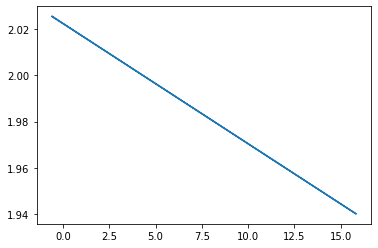

In [49]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Time_Duration(min)', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Time_Duration(min)', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Time_Duration(min)', 'Severity')

Weather Condition

<Robust Scaling + Label Encoding>
Socre: -0.0002469898437258422
coef_ : [-8.03897087e-05]
intercept_ : 2.02312849196382


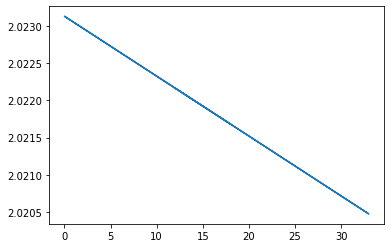


<Min-Max Scaling + Label Encoding>
Socre: -0.0002469898437258422
coef_ : [-8.03897087e-05]
intercept_ : 2.02312849196382


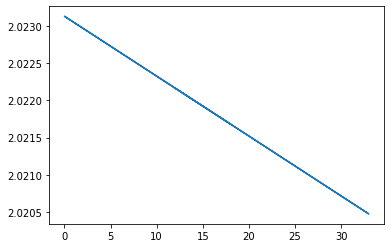


<Standard Scaling + Label Encoding>
Socre: -0.0002469898437258422
coef_ : [-8.03897087e-05]
intercept_ : 2.02312849196382


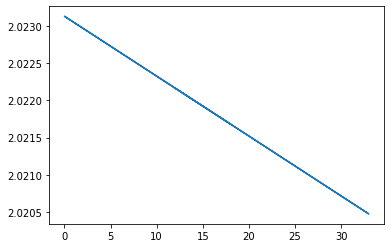

In [50]:
print("<Robust Scaling + Label Encoding>")
Linear_Regression(robust_label(data_Orlando_test), 'Weather_Condition', 'Severity')
print()

print("<Min-Max Scaling + Label Encoding>")
Linear_Regression(MinMaxSacling_LabelEncoding(data_Orlando_test), 'Weather_Condition', 'Severity')
print()

print("<Standard Scaling + Label Encoding>")
Linear_Regression(standard_label(data_Orlando_test), 'Weather_Condition', 'Severity')

### KNN

In [25]:
# modeling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def KNN(data, target, scale_encode_method):
  # create a dataframe with all training data except the target feature
  X = data.drop(columns = [target])

  X = scale_encode_method(X) # scale the data
  y = data[target].values # seperate target feature

  # split dataset into train and test data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

  # create new knn model
  knn = KNeighborsClassifier()

  # create a dictionary of all values we want to test for n_neighbors
  param_grid = {'n_neighbors': np.arange(1, 25)}

  # use GridSearch to test all values for n_neighbors
  knn_gscv = GridSearchCV(knn, param_grid, cv = 5)

  # fit model to data
  knn_gscv.fit(X_train, y_train)

  # check top performing n_neighbors value
  # print(knn_gscv.best_params_)

  # check the mean score for the top performing value of n_neighbors
  # print(knn_gscv.best_score_)

  knn2 = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_.get('n_neighbors'))
  knn2.fit(X_train, y_train)
  # print(knn2.score(X_test, y_test))

  return knn_gscv.best_params_, knn2.score(X_test, y_test)

In [26]:
# evaluation of KNN

from sklearn.model_selection import cross_val_score

def KNN_eval(data, target, scale_encode_method, knn_best_k):
  # create a dataframe with all training data except the target feature
  X = data.drop(columns = [target])

  X = scale_encode_method(X) # scale the data
  y = data[target].values # seperate target feature

  knn_cv = KNeighborsClassifier(n_neighbors = knn_best_k.get('n_neighbors'))
  cv_scores = cross_val_score(knn_cv, X, y, cv = 5)

  # print(cv_scores)
  # print('cv_scores mean: {}'.format(np.mean(cv_scores)))
  return cv_scores

In [27]:
print("<Robust Scaling + Label Encoding>")
rl_knn_best_k, rl_knn_test_score = KNN(data_Orlando_test, 'Severity', robust_label)
print(rl_knn_best_k)
print('accuracy: {}'.format(rl_knn_test_score))

print('\nk-fold cross validation')
rl_cv_scores = KNN_eval(data_Orlando_test, 'Severity', robust_label, rl_knn_best_k)
print(rl_cv_scores)
print('mean accuracy: {}'.format(np.mean(rl_cv_scores)))

<Robust Scaling + Label Encoding>
{'n_neighbors': 5}
accuracy: 0.9730538922155688

k-fold cross validation
[0.9740519  0.97355289 0.97355289 0.97355289 0.97403894]
mean accuracy: 0.9737499040859868


In [27]:
print("<Min-Max Scaling + Label Encoding>")
mml_knn_best_k, mml_knn_test_score = KNN(data_Orlando_test, 'Severity', MinMaxSacling_LabelEncoding)
print(mml_knn_best_k)
print(mml_knn_test_score)
print('accuracy: {}'.format(mml_knn_test_score))

print('\nk-fold cross validation')
mml_cv_scores = KNN_eval(data_Orlando_test, 'Severity', MinMaxSacling_LabelEncoding, mml_knn_best_k)
print(mml_cv_scores)
print('mean accuracy: {}'.format(np.mean(mml_cv_scores)))

<Min-Max Scaling + Label Encoding>
{'n_neighbors': 8}
0.9726640159045725
accuracy: 0.9726640159045725

k-fold cross validation
[0.97266402 0.97266402 0.97266402 0.97314769 0.97314769]
mean accuracy: 0.9728574846297648


In [27]:
print("<Standard Scaling + Label Encoding>")
sl_knn_best_k, sl_knn_test_score = KNN(data_Orlando_test, 'Severity', standard_label)
print(sl_knn_best_k)
print('accuracy: {}'.format(sl_knn_test_score))

print('\nk-fold cross validation')
sl_cv_scores = KNN_eval(data_Orlando_test, 'Severity', standard_label, sl_knn_best_k)
print(sl_cv_scores)
print('mean accuracy: {}'.format(np.mean(sl_cv_scores)))

<Standard Scaling + Label Encoding>
{'n_neighbors': 8}
accuracy: 0.9730134932533733

k-fold cross validation
[0.97301349 0.97351324 0.97351324 0.97301349 0.97301349]
mean accuracy: 0.9732133933033482


In [27]:
print("<Robust Scaling + One-Hot Encoding>")
roh_knn_best_k, roh_knn_test_score = KNN(data_Orlando_test, 'Severity', robust_oneHot)
print(roh_knn_best_k)
print('accuracy: {}'.format(roh_knn_test_score))

print('\nk-fold cross validation')
roh_cv_scores = KNN_eval(data_Orlando_test, 'Severity', robust_oneHot, roh_knn_best_k)
print(roh_cv_scores)
print('mean accuracy: {}'.format(np.mean(roh_cv_scores)))

<Robust Scaling + One-Hot Encoding>
{'n_neighbors': 8}
accuracy: 0.97356608478803

k-fold cross validation
[0.97406484 0.97406484 0.97406484 0.97356608 0.97356608]
mean accuracy: 0.9738653366583542


In [65]:
print("<Min-Max Scaling + One-Hot Encoding>")
mmoh_knn_best_k, mmoh_knn_test_score = KNN(data_Orlando_test, 'Severity', MinMaxSacling_OneHotEncoding)
print(mmoh_knn_best_k)
print('accuracy: {}'.format(mmoh_knn_test_score))

print('\nk-fold cross validation')
mmoh_cv_scores = KNN_eval(data_Orlando_test, 'Severity', MinMaxSacling_OneHotEncoding, mmoh_knn_best_k)
print(mmoh_cv_scores)
print('mean accuracy: {}'.format(np.mean(mmoh_cv_scores)))

<Min-Max Scaling + One-Hot Encoding>
{'n_neighbors': 12}
accuracy: 0.971627675460428

k-fold cross validation
[0.97212544 0.97162768 0.97112992 0.97162768 0.97162768]
accuracy: 0.971627675460428


In [27]:
print("<Standard Scaling + One-Hot Encoding>")
soh_knn_best_k, soh_knn_test_score = KNN(data_Orlando_test, 'Severity', standard_one_hot)
print(soh_knn_best_k)
print('accuracy: {}'.format(soh_knn_test_score))

print('\nk-fold cross validation')
soh_cv_scores = KNN_eval(data_Orlando_test, 'Severity', standard_one_hot, soh_knn_best_k)
print(soh_cv_scores)
print('mean accuracy: {}'.format(np.mean(soh_cv_scores)))

<Standard Scaling + One-Hot Encoding>
{'n_neighbors': 7}
accuracy: 0.973605577689243

k-fold cross validation
[0.97360558 0.97310757 0.97209766 0.97359243 0.97359243]
mean accuracy: 0.973199131724224


### Decision Tree Clssifier

In [51]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus
from IPython.display import Image
  
def decision_tree(data):
    dp=pd.DataFrame.copy(data)
    #data
    X = dp.iloc[:, 1:].values
    #target
    y = data_Orlando_test['Severity'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y,random_state=1)
    # max_depth = 5
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_train,y_train)
    #y_pred=tree_model.predict(X_test)
    print("Train Set Score:{:.2f}".format(tree_model.score(X_train,y_train)))
    print("test Set Score:{:.2f}".format(tree_model.score(X_test,y_test)))

In [53]:
print("<Robust Scaling + Label Encoding>")
decision_tree(robust_label(data_Orlando_test))
print()

print("<Min-Max Scaling + Label Encoding>")
decision_tree(MinMaxSacling_LabelEncoding(data_Orlando_test))
print()

print("<Standard Scaling + Label Encoding>")
decision_tree(standard_label(data_Orlando_test))
print()

print("<Robust Scaling + One-Hot Encoding>")
decision_tree(robust_oneHot(data_Orlando_test))
print()

print("<Min-Max Scaling + One-Hot Encoding>")
decision_tree(MinMaxSacling_OneHotEncoding(data_Orlando_test))
print()

print("<Standard Scaling + One-Hot Encoding>")
decision_tree(standard_one_hot(data_Orlando_test))

<Robust Scaling + Label Encoding>
Train Set Score:1.00
test Set Score:0.95

<Min-Max Scaling + Label Encoding>
Train Set Score:1.00
test Set Score:0.95

<Standard Scaling + Label Encoding>
Train Set Score:1.00
test Set Score:0.96

<Robust Scaling + One-Hot Encoding>
Train Set Score:1.00
test Set Score:0.96

<Min-Max Scaling + One-Hot Encoding>
Train Set Score:1.00
test Set Score:0.96

<Standard Scaling + One-Hot Encoding>
Train Set Score:1.00
test Set Score:0.96


## NOT IN CLASS

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


def LogisticRegressionFunc(df):
  # select
  X = df.iloc[:, :-1].values
  y = df['Severity'].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)
  
  # logistic Regression
  model = LogisticRegression(random_state = 77)

  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  acc = accuracy_score(y_test, y_predict)

  print("Logistic regression accuracy_score: {}.".format(acc))

  # confusion Matrix
  confusionMatrix = confusion_matrix(y_true = y_test, y_pred = y_predict)

  # visualization
  index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
  columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
  conf_matrix = pd.DataFrame(data=confusionMatrix, columns=columns, index=index)
  plt.figure(figsize=(8, 5))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
  plt.title("Confusion Matrix - Logistic Regression")
  plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Logistic regression accuracy_score: 0.977061170212766.


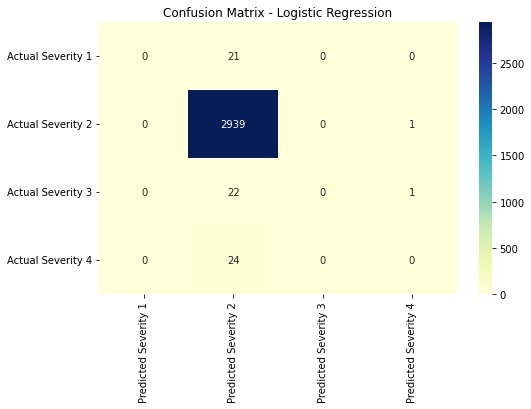

Logistic regression accuracy_score: 0.9773936170212766.


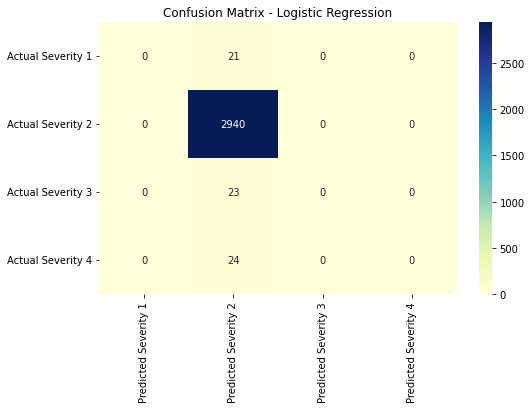

Index(['Distance(mi)', 'Time_Duration(min)', 'Lng', 'Humidity(%)',
       'Pressure(in)', 'Lat', 'Temperature(F)', 'Wind_Chill(F)',
       'Wind_Speed(mph)'],
      dtype='object')
Logistic regression accuracy_score: 0.977061170212766.


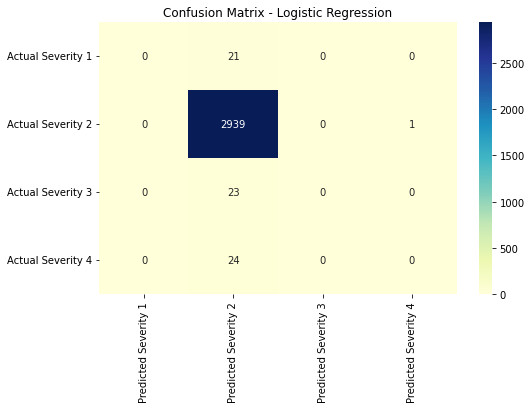

In [ ]:
LogisticRegressionFunc(robust_label(data_Orlando_test))

LogisticRegressionFunc(minMaxLabel)

LogisticRegressionFunc(standard_label(data_Orlando_test))

**SVM**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


def svm(data):
    from sklearn import svm
    #X = data.iloc[:, :-1].values
    dp=pd.DataFrame.copy(data)
    X = dp.iloc[:, :-1].values
    y = data_Orlando_test['Severity'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y,random_state=1)
    svm_clf =svm.SVC(kernel = 'linear')
    svm_clf.fit(X_train,y_train)
    y_predict=svm_clf.predict(X_test)

    #grid search
    param_grid = {'C': [0.1, 1, 10, 100]}
    clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
    clf_grid.fit(X_train,y_train)
    print("Best Parameters:\n", clf_grid.best_params_)

    #find score
    scores = cross_val_score(svm_clf, X, y, cv =3 )
    return scores

In [ ]:
svm(MinMaxSacling_OneHotEncoding(data_Orlando_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1}


array([0.97307002, 0.97395989, 0.97336127])

In [ ]:
svm(MinMaxSacling_LabelEncoding(data_Orlando_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1}


array([1., 1., 1.])

In [ ]:
svm(standard_one_hot(data_Orlando_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1}


array([0.97336924, 0.97246333, 0.97276265])

In [ ]:
svm(standard_label(data_Orlando_test))

Index(['Distance(mi)', 'Time_Duration(min)', 'Lng', 'Humidity(%)',
       'Pressure(in)', 'Lat', 'Temperature(F)', 'Wind_Chill(F)',
       'Wind_Speed(mph)'],
      dtype='object')
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1}


array([1., 1., 1.])

In [ ]:
svm(robust_oneHot(data_Orlando_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1}


array([0.97336924, 0.97216402, 0.97276265])

In [ ]:
svm(robust_label(data_Orlando_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:
 {'C': 0.1}


array([1., 1., 1.])